In [5]:
using LinearAlgebra, Plots

In [6]:
### Campo óptico ###

E(x,y,w₀,m)=(sqrt(x^2+y^2)/w₀)^abs(m)*exp(-(x^2+y^2)/w₀^2)*exp(im*m*atan(y,x)) 

I(Ex,Ey)=abs2.(Ex) .+ abs2.(Ey) #Intensidad

### Bases unitarias ###

x=[1;0] # Horizontal 
y=[0;1] # Vertical 

d=1/sqrt(2).*[1;1] # Diagonal 
a=1/sqrt(2).*[1;-1] # Antidiagonal 

r=1/sqrt(2).*[1;im] # Circular derecha
l=1/sqrt(2).*[1;-im] # Circular izquierda

### Retardador & Polarizador ###

#Polarizador lineal 

function J_LP(Ex_in,Ey_in,θ)  

    Ex_out=Ex_in*cos(θ)^2 .+ Ey_in*sin(θ)*cos(θ)
    Ey_out=Ex_in*sin(θ)*cos(θ) .+ Ey_in*sin(θ)^2

    return Ex_out,Ey_out

end

#Retardador de un cuarto de onda 

function J_λ_4(Ex_in,Ey_in,θ) 

    A=1+im*cos(2*θ)
    B=im*sin(2*θ)
    C=1-im*cos(2*θ)

    Ex_out=(1/sqrt(2))*(A.*Ex_in .+ B.*Ey_in)
    Ey_out=(1/sqrt(2))*(B.*Ex_in .+ C.*Ey_in)

    return Ex_out,Ey_out
    
end

#Retardador de media onda

function J_λ_2(Ex_in,Ey_in,θ)

    Ex_out=Ex_in*cos(2*θ) .+ Ey_in*sin(2*θ)
    Ey_out=Ex_in*sin(2*θ) .- Ey_in*cos(2*θ)

    return Ex_out,Ey_out

end

#Retardador de un cuarto de onda & Polarizador Lineal 

function J_λ_4__LP(E_tot,base) 

    Ex_in=E_tot*base[1]
    Ey_in=E_tot*base[2]

    ϕ=[0 π/6 π/4 π/3 π/2 π]
    θ=collect(range(0,2π,100))

    I_raw=zeros(length(θ),length(ϕ))
    
    for i=1:length(ϕ)
        for j=1:length(θ)
            Ex_out_1,Ey_out_1=J_λ_4(Ex_in,Ey_in, ϕ[i])
            Ex_out_2,Ey_out_2=J_LP(Ex_out_1,Ey_out_1,θ[j])
            I_raw[j,i]=sum(I(Ex_out_2,Ey_out_2))
        end
    end

    b=Base_Identifier(base)

    plot(θ,I_raw[:,1]./maximum(I_raw),label="ϕ=0",title="p̂=$b", #"I(θ) = E(x,y)·$b + Retarder (Φ, λ/4) + Linear Polarizer (θ)"
        titlefont=font(10),
        xlabel="θ",ylabel="I(θ)", xaxis=font(8),yaxis=font(8),
        xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]),aspect_ratio=1)
    plot!(θ,I_raw[:,2]./maximum(I_raw),label="ϕ=π/6")
    plot!(θ,I_raw[:,3]./maximum(I_raw),label="ϕ=π/4")
    plot!(θ,I_raw[:,4]./maximum(I_raw),label="ϕ=π/3")
    plot!(θ,I_raw[:,5]./maximum(I_raw),label="ϕ=π/2")
    plot!(θ,I_raw[:,6]./maximum(I_raw),label="ϕ=π")
    #plot!(legend=:outerbottom, legendcolumns=6)

end

#Retardador de media onda & Polarizador Lineal 

function J_λ_2__LP(E_tot,base) 

    Ex_in=E_tot*base[1]
    Ey_in=E_tot*base[2]

    ϕ=[0 π/6 π/4 π/3 π/2 π]
    θ=collect(range(0,2π,100))

    I_raw=zeros(length(θ),length(ϕ))
    
    for i=1:length(ϕ)
        for j=1:length(θ)
            Ex_out_1,Ey_out_1=J_λ_2(Ex_in,Ey_in, ϕ[i])
            Ex_out_2,Ey_out_2=J_LP(Ex_out_1,Ey_out_1,θ[j])
            I_raw[j,i]=sum(I(Ex_out_2,Ey_out_2))
        end
    end

    b=Base_Identifier(base)

    plot(θ,I_raw[:,1]./maximum(I_raw),label="ϕ=0",title="p̂=$b", #"I(θ) = E(x,y)·$b + Retarder (ϕ, λ/2) + Linear Polarizer (θ)"
        titlefont=font(10),
        xlabel="θ",ylabel="I(θ)", xaxis=font(8),yaxis=font(8),
        xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]),aspect_ratio=1)
    plot!(θ,I_raw[:,2]./maximum(I_raw),label="ϕ=π/6")
    plot!(θ,I_raw[:,3]./maximum(I_raw),label="ϕ=π/4")
    plot!(θ,I_raw[:,4]./maximum(I_raw),label="ϕ=π/3")
    plot!(θ,I_raw[:,5]./maximum(I_raw),label="ϕ=π/2")
    plot!(θ,I_raw[:,6]./maximum(I_raw),label="ϕ=π")

end

#Visualization

function Base_Identifier(b) #Vector -> String
    #Bases unitarias 

    x=[1;0] #Horizontal 
    y=[0;1] #Vertical 

    d=1/sqrt(2).*[1;1] #"Positive" diagonal 
    a=1/sqrt(2).*[1;-1] #"Negative" diagonal 

    r=1/sqrt(2).*[1;im] #"Positive" orientation 
    l=1/sqrt(2).*[1;-im] # "Negative" orientation

    if b == x
        v="x̂"
    elseif b == y
        v="ŷ"
    elseif b == d
        v="d̂"
    elseif b == a
        v="â"
    elseif b == r
        v="r̂"
    else b == l
        v="l̂"
    end

    return v
    
end

Base_Identifier (generic function with 1 method)

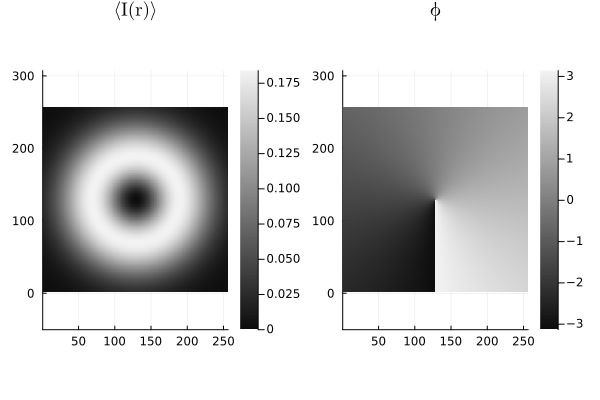

In [7]:
w₀=1E-3 #Tamaño de la cintura 
m=1 #Carga topológica 
x_max=3*w₀ #Escala
N=256 #Resolución (Potencia de 2)

xs=(x_max/2).*(2/N).*collect(range(-N/2,N/2-1,N)) #Ventana numérica simétrica 
ys=xs'

E_tot=E.(xs,ys,w₀,m)

I_tot=abs.(E_tot).^2

j=heatmap(I_tot,colormap=:grays,aspect_ratio=1,title="⟨I(r)⟩",titlefont=font(12,"Computer Modern"))
phase=angle.(E_tot)
k=heatmap(phase,colormap=:grays,aspect_ratio=1,title="ϕ",titlefont=font(12,"Computer Modern"))

plot(j,k)

In [8]:
## Malus law ##

#Nota: Cualquier base cumple la Ley de Malus

base=x #base:Initial polarization

Ex_in=E_tot*base[1]
Ey_in=E_tot*base[2]

I_raw=zeros(100,1)
θ=collect(range(0,2π,100))

for i=1:length(θ)
    Ex_out,Ey_out=J_LP(Ex_in,Ey_in,θ[i])
    I_raw[i]=sum(I(Ex_out,Ey_out))
end

c=plot(θ,I_raw./maximum(I_raw),title="Linear Polarizer Matrix",aspect_ratio=1,
    titlefont=font(12),label="P=I(θ)",
    xlabel="θ",ylabel="I(θ)", xaxis=font(7),yaxis=font(7),
    xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]))
e=plot(θ,cos.(θ).^2,title="Malus law",aspect_ratio=1,
    titlefont=font(12),label="P=I(θ)",
    xlabel="θ",ylabel="I(θ)", xaxis=font(7),yaxis=font(7),
    xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]))

Mln=plot(c,e)

png(Mln,"Malus_Law_Numeric")

"Malus_Law_Numeric.png"

In [ ]:
base=x #Nota:Cualquier base no cambia la intensidad 

Ex_in=E_tot*base[1]
Ey_in=E_tot*base[2]

I_raw=zeros(100,1)
θ=collect(range(0,2π,100))

for i=1:length(θ)
    Ex_out,Ey_out=J_λ_2(Ex_in,Ey_in,θ[i]) 
    I_raw[i]=sum(I(Ex_out,Ey_out))
end

plot(θ,I_raw./maximum(I_raw),title="Retarder Matrix (λ/2)",aspect_ratio=1,
    titlefont=font(12,"Computer Modern"),label="P=I(θ)",
    xlabel="θ",ylabel="I(θ)", xaxis=font(7),yaxis=font(7),
    xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]))

In [ ]:
## Retardador de un cuarto de onda ##

base=x
plot_1=J_λ_4__LP(E_tot,base)

base=r
plot_2=J_λ_4__LP(E_tot,base)

base=d
plot_3=J_λ_4__LP(E_tot,base)

plot(plot_1,plot_2,plot_3,plot_title="I(θ) = E(x,y)·p̂ + Retarder (ϕ, λ/4) + Linear Polarizer (θ)",
    plot_titlefont=font(10),plot_titlevspan=.09)

In [13]:
base=y
plot_1=J_λ_4__LP(E_tot,base)

R_eje=plot(plot_1,plot_title="I(θ) = E(x,y)·p̂ + Retarder (ϕ, λ/4) + Linear Polarizer (θ)",
    plot_titlefont=font(10),plot_titlevspan=.09)

png(R_eje,"Retarder_1_4")  

"Retarder_1_4.png"

In [16]:
base=y
plot_1=J_λ_2__LP(E_tot,base)

R2_eje=plot(plot_1,plot_title="I(θ) = E(x,y)·p̂ + Retarder (ϕ, λ/2) + Linear Polarizer (θ)",
    plot_titlefont=font(10),plot_titlevspan=.09)

png(R2_eje,"Retarder_1_2_y")  

"Retarder_1_2_y.png"

In [17]:
base=r
plot_1=J_λ_2__LP(E_tot,base)

R3_eje=plot(plot_1,plot_title="I(θ) = E(x,y)·p̂ + Retarder (ϕ, λ/2) + Linear Polarizer (θ)",
    plot_titlefont=font(10),plot_titlevspan=.09)

png(R3_eje,"Retarder_1_2_r")  

"Retarder_1_2_r.png"

In [ ]:
## Retardador de media onda ##

base=x
plot_1=J_λ_2__LP(E_tot,base)

base=r
plot_2=J_λ_2__LP(E_tot,base)

base=d
plot_3=J_λ_2__LP(E_tot,base)

plot(plot_1,plot_2,plot_3,plot_title="I(θ) = E(x,y)·p̂ + Retarder (ϕ, λ/2) + Linear Polarizer (θ)",
    plot_titlefont=font(10),plot_titlevspan=.09)

In [ ]:
    base=x
    
    Ex_in=E_tot*base[1]
    Ey_in=E_tot*base[2]

    ϕ=collect(range(0,2π,1000))
    θ=collect(range(0,2π,100))

    I_raw=zeros(length(θ),length(ϕ))
    
    for i=1:length(ϕ)
        for j=1:length(θ)
            Ex_out_1,Ey_out_1=J_λ_2(Ex_in,Ey_in, ϕ[i])
            Ex_out_2,Ey_out_2=J_LP(Ex_out_1,Ey_out_1,θ[j])
            I_raw[j,i]=sum(I(Ex_out_2,Ey_out_2))
        end
    end


In [ ]:
anim= @animate for i=1:length(ϕ)
    ϕ_i=string(round(ϕ[i],digits=3))
    plot(θ,I_raw[:,i]./maximum(I_raw),legend=false,xlabel="θ",ylabel="I(θ)"
    ,ylims=(0,1),xaxis=font(7),yaxis=font(7),
    xticks = ([0:π/2:2*π;], ["0","\\pi/2","\\pi","3 \\pi/2","2\\pi"]),
    title="I(θ) = E(x,y)·x̂ + Retarder (ϕ=$ϕ_i, λ/2) + Linear Polarizer (θ)",titlefont=font(10))
end

gif(anim, "Retarder_λ_2_x.gif",fps=10)

In [22]:
## Stokes parameters ##


#function Stokes_parameters(E₀,GP) GP ϵ [0,1]
GP=.7
m=10
w₀=.0001

E_tot=E.(xs,ys,w₀,m)


#Cartesian base 
base_x=x
base_y=y

Ex_1=E_tot*base_x[1]
Ex_2=E_tot*base_x[2]

Ey_1=E_tot*base_y[1]
Ey_2=E_tot*base_y[2]

Ex=[]
Ey=[]

for i=1:N
    for j=1:N
        E_x=push!(Ex,Ex_1[i,j])
        E_y=push!(Ey,Ey_1[i,j])
    end
end

for i=1:N
    for j=1:N
        E_x=push!(Ex,Ex_2[i,j])
        E_y=push!(Ey,Ey_2[i,j])
    end
end

Ex=reshape(reduce(vcat,Ex),(N,2N))'.*exp(rand()) #Fase aleatoria 
Ey=reshape(reduce(vcat,Ey),(N,2N))'.*exp(rand())

S₀=abs2.(sum(Ex)) + abs2.(sum(Ey)) #sum(abs2.(Ex) .+ abs2.(Ey))
S₁=abs2.(sum(Ex)) - abs2.(sum(Ey))
S₂=2*real(sum(Ex)*conj(sum(Ey)))
S₃=2*imag(sum(Ex)*conj(sum(Ey)))

S_PP= GP.*[S₀;S₁;S₂;S₃].+(1-GP).*[S₀;0;0;0]

S₀=S_PP[1]
S₁=S_PP[2]
S₂=S_PP[3]
S₃=S_PP[4]

P=sqrt(S₁^2+S₂^2+S₃^2)/S₀

0.7000000000000001